# DIP ASSIGNMENT 2 - 2019900009

In [697]:
import cv2
import matplotlib.pyplot as plt
import psutil
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import numpy as np
from skimage.transform import resize, rescale
from scipy import fftpack
import skimage.filters
init_notebook_mode(connected = True)
import math
import os
from cmath import exp, pi
from math import log, ceil
import time

In [919]:
from scipy.fftpack import fft2,ifft2

## Q1 - Linear Spatial Filters

In [693]:
def zeroPadImage(im,k):
    c,r = im.shape[:2] 
    pad = int((k-1)/2)
    N,M = c+(2*pad),r+(2*pad)      
    tmp = np.zeros((N,M))
    tmp[pad:N-pad,pad:M-pad] = im
    return tmp

In [100]:
def lowPassFilter(im,k):
    fil = (1/k*k)*np.ones((k,k))
    w = int((k-1)/2)
    cols,rows = im.shape[:2]
    out = np.zeros((cols,rows))
    tmp = zeroPadImage(im,k)
    N,M = tmp.shape
    for i in range(w,M-w):
        for j in range(w,N-w):
            m = im[i-w:i+w+1, j-w:j+w+1]**fil
            out[i-w][j-w] = int(m)
    return out

In [699]:
def customAvgFilter(im,k):
    c,r = im.shape[:2]
    w = int((k-1)/2)
    tmp = zeroPadImage(im,k)
    M,N = tmp.shape
    mean = np.zeros((c,r))
    for i in range(w,M-w):
        Cols = np.zeros((k,k))
        Cols[:,:] = tmp[i-w:i+w+1,:k]
        for j in range(w,N-w):
            mean[i-w][j-w] = np.mean(Cols)
            newCol = np.reshape(np.array(tmp[i-w:i+w+1, j+w]),(k, 1))
            Cols = np.delete(Cols, 0, 1)
            Cols = np.append(Cols, newCol, axis=1)
    return mean

In [700]:
sizes = []
images = []

im1 = cv2.imread("../images/bell.jpg",0)
im2 = cv2.imread("../images/kobe.png",0)
im3 = cv2.imread("../images/mountain.jpg",0)

images.append(im1)
images.append(im2)
images.append(im3)

sizes.append(im1.shape[0]*im1.shape[1])
sizes.append(im2.shape[0]*im2.shape[1])
sizes.append(im3.shape[0]*im3.shape[1])


In [701]:
kArr = [3,5,7,9]
runtimes = []

for im in images:
    rtime = []
    for k in kArr:
        start = time.time()
        imAvg = customAvgFilter(im,k)
        rtime.append(time.time()-start)
    runtimes.append(rtime)

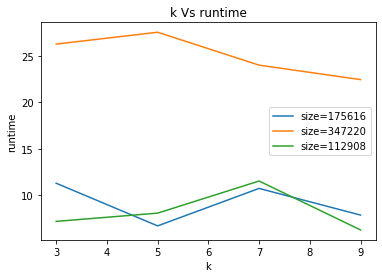

In [706]:
plt.plot(kArr,runtimes[0],label='size='+str(sizes[0]))
plt.plot(kArr,runtimes[1],label='size='+str(sizes[1]))
plt.plot(kArr,runtimes[2],label='size='+str(sizes[2]))

plt.xlabel('k')
plt.ylabel('runtime')

plt.title('k Vs runtime')
plt.legend()
plt.show()

In [102]:
def customMedFilter(im,k):
    c,r = im.shape[:2]
    w = int((k-1)/2)
    tmp = zeroPadImage(im,k)
    M,N = tmp.shape
    mean = np.zeros((c,r))
    for i in range(w,M-w):
        Cols = np.zeros((k,k))
        Cols[:,:] = tmp[i-w:i+w+1,:k]
        for j in range(w,N-w):
            mean[i-w][j-w] = np.median(Cols)
            newCol = np.reshape(np.array(tmp[i-w:i+w+1, j+w]),(k, 1))
            Cols = np.delete(Cols, 0, 1)
            Cols = np.append(Cols, newCol, axis=1)
    return mean

In [103]:
im = cv2.imread("../images/Noisy.jpg",0)
print(im.shape)

(240, 320)


In [104]:
out = customMedFilter(im,5)

(-0.5, 319.5, 239.5, -0.5)

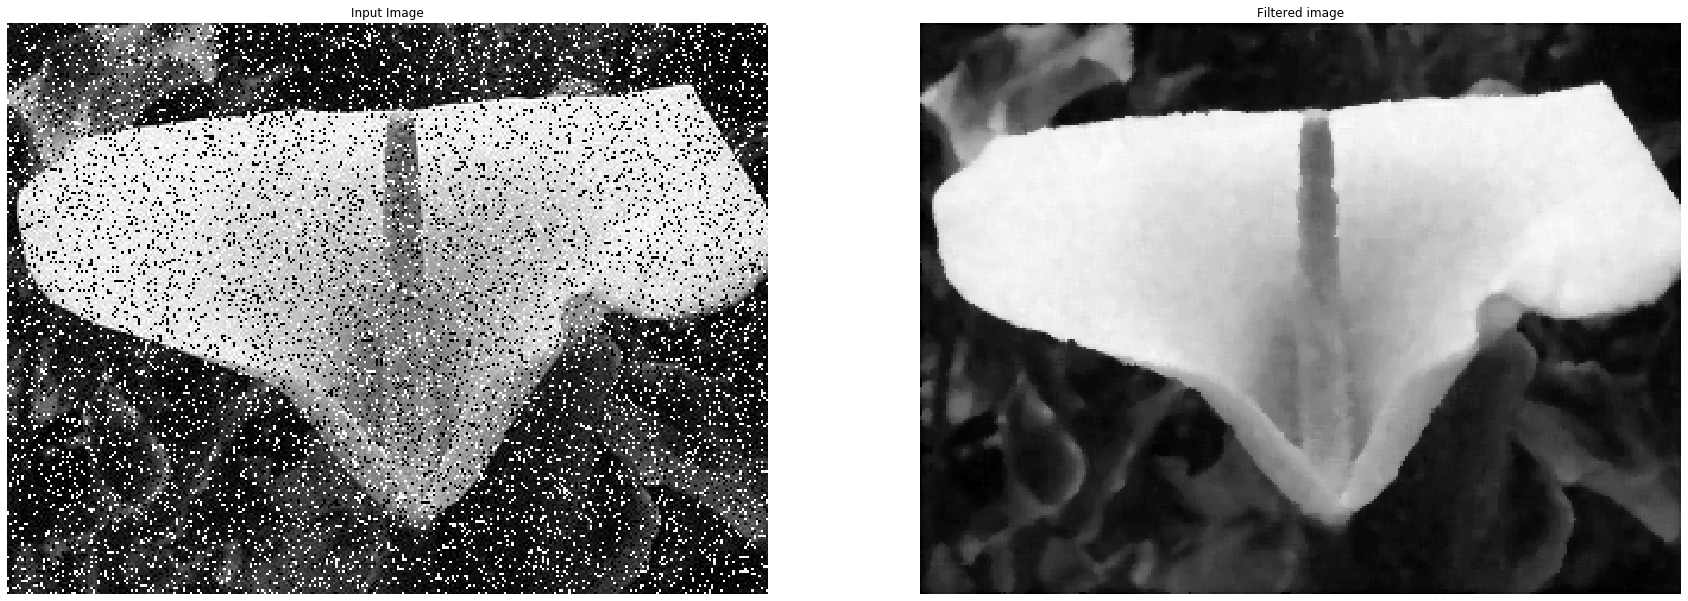

In [105]:
fig, axs = plt.subplots(1, 2,figsize=(30,20))
axs[0].imshow(im, cmap="gray")
axs[0].set_title('Input Image')
axs[1].imshow(out, cmap="gray")
axs[1].set_title('Filtered image')

axs[0].axis("off")
axs[1].axis("off")


## Q2 - Edge Detection

In [106]:
img = cv2.imread("../images/bell.jpg",0)

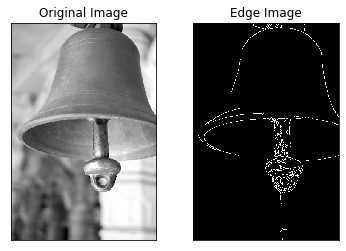

In [107]:
edges = cv2.Canny(img,100,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [113]:
def convolution(im, kernel, k):
    M, N = im.shape
    w = int((k - 1) / 2)
    out = np.zeros(im.shape)
    paddedImage = zeroPadImage(im,k)
    for row in range(M):
        for col in range(N):
            out[row, col] = np.sum(kernel * paddedImage[row:row + k, col:col + k])
    return out

In [114]:
kobe = cv2.imread("../images/kobe.png",0)

In [714]:
#Sobel
sobel_X = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kobe_x = convolution(kobe, sobel_X, 3)

sobel_Y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_kobe_y = convolution(kobe, sobel_Y, 3)

sobel_gm = np.sqrt(np.square(sobel_kobe_x) + np.square(sobel_kobe_y))
sobel_gm *= 255.0 / sobel_gm.max()

In [ ]:
#Prewitt
pw_X = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
pw_kobe_x = convolution(kobe, pw_X, 3)

pw_Y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
pw_kobe_y = convolution(kobe, pw_Y, 3)

pw_gm = np.sqrt(np.square(pw_kobe_x) + np.square(pw_kobe_y))
pw_gm *= 255.0 / pw_gm.max()

In [129]:
#Laplacian
lap = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
lap_kobe = convolution(kobe, lap, 3)


In [134]:
#Roberts
rob_X = np.array([[0, 1], [-1, 0]])
rob_kobe_x = convolution(kobe, rob_X, 2)

rob_Y = np.array([[1, 0], [0, -1]])
rob_kobe_y = convolution(kobe, rob_Y, 2)

rob_gm = np.sqrt(np.square(rob_kobe_x) + np.square(rob_kobe_y))
rob_gm *= 255.0 / rob_gm.max()

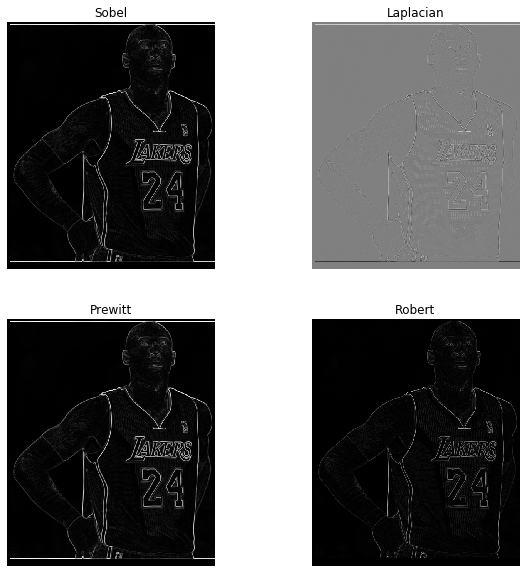

In [713]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (1,0),)
ax3 = plt.subplot2grid((2,2), (0,1),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.imshow(sobel_gm,cmap = 'gray',label='Sobel')
ax2.imshow(pw_gm,cmap = 'gray')
ax3.imshow(lap_kobe,cmap = 'gray')
ax4.imshow(rob_gm,cmap = 'gray')

ax1.set_title('Sobel')
ax2.set_title('Prewitt')
ax3.set_title('Laplacian')
ax4.set_title('Robert')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.show()

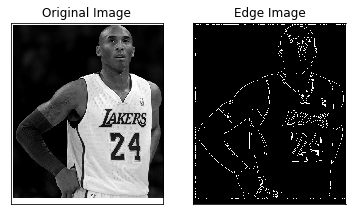

In [715]:
edges = cv2.Canny(kobe,100,250)

plt.subplot(121),plt.imshow(kobe,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [203]:
a = np.reshape(np.array([1,2,0,-2,-1]),(1,5))
b = np.reshape(np.array([2,3,4,3,2]),(5,1))

sobel_5X = b@a #Sx
sobel_5Y = a.T@b.T #Sy

In [204]:
ap = np.reshape(np.array([2,1,0,-1,-2]),(1,5))
bp = np.reshape(np.array([1,1,1,1,1]),(5,1))

prewitt_5X = bp@ap #Px
prewitt_5X = ap.T@bp.T

In [205]:
#Sobel 5X5
sobel_kobe_5x = convolution(kobe, sobel_5X, 5)
sobel_kobe_5y = convolution(kobe, sobel_5Y, 5)

sobel_5gm = np.sqrt(np.square(sobel_kobe_5x) + np.square(sobel_kobe_5y))
sobel_5gm *= 255.0 / sobel_5gm.max()

In [206]:
#Prewitt 5X5
pw_kobe_5x = convolution(kobe, prewitt_5X, 5)
pw_kobe_5y = convolution(kobe, prewitt_5X, 5)

pw_5gm = np.sqrt(np.square(pw_kobe_5x) + np.square(pw_kobe_5y))
pw_5gm *= 255.0 / pw_5gm.max()

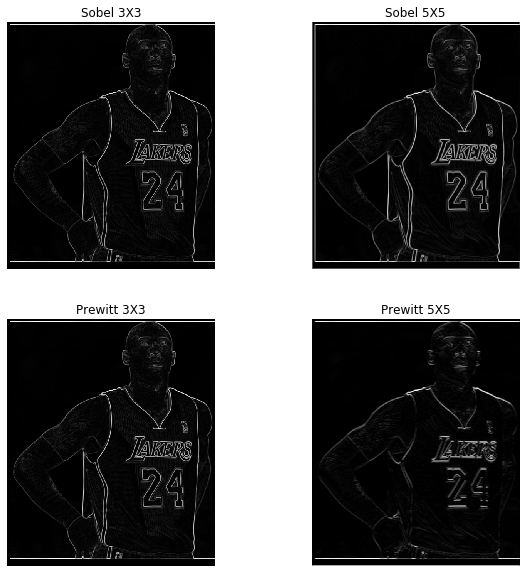

In [716]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (1,0),)
ax3 = plt.subplot2grid((2,2), (0,1),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.imshow(sobel_gm,cmap = 'gray'')
ax2.imshow(pw_gm,cmap = 'gray')
ax3.imshow(sobel_5gm,cmap = 'gray')
ax4.imshow(pw_5gm,cmap = 'gray')

ax1.set_title('Sobel 3X3')
ax2.set_title('Prewitt 3X3')
ax3.set_title('Sobel 5X5')
ax4.set_title('Prewitt 5X5')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.show()

In [225]:
def gaussNoiseAdd(im, mean=0, var=0.5):
    if len(kobe.shape)>2 : row,col,nch= im.shape
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,im.shape)
    gauss = gauss.reshape(im.shape)
    out = 0.5*im + 0.5*gauss
    return out

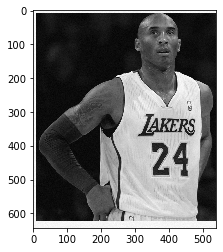

In [226]:
noisy_kobe = gaussNoiseAdd(kobe,0.5,0.91)
plt.imshow(noisy_kobe, cmap='gray')

In [718]:
sobel_nkobe_x = convolution(noisy_kobe, sobel_X, 3)
sobel_nkobe_y = convolution(noisy_kobe, sobel_Y, 3)
sobel_gm = np.sqrt(np.square(sobel_nkobe_x) + np.square(sobel_nkobe_y))
sobel_gm *= 255.0 / sobel_gm.max()

pw_nkobe_x = convolution(noisy_kobe, pw_X, 3)
pw_nkobe_y = convolution(noisy_kobe, pw_Y, 3)
pw_gm = np.sqrt(np.square(pw_nkobe_x) + np.square(pw_nkobe_y))
pw_gm *= 255.0 / pw_gm.max()

lap_nkobe = convolution(noisy_kobe, lap, 3)

rob_nkobe_x = convolution(noisy_kobe, rob_X, 2)
rob_nkobe_y = convolution(noisy_kobe, rob_Y, 2)
rob_gm = np.sqrt(np.square(rob_nkobe_x) + np.square(rob_nkobe_y))
rob_gm *= 255.0 / rob_gm.max()


sobel_nkobe_5x = convolution(noisy_kobe, sobel_5X, 5)
sobel_nkobe_5y = convolution(noisy_kobe, sobel_5Y, 5)
sobel_5gm = np.sqrt(np.square(sobel_nkobe_5x) + np.square(sobel_nkobe_5y))
sobel_5gm *= 255.0 / sobel_5gm.max()

pw_nkobe_5x = convolution(noisy_kobe, prewitt_5X, 5)
pw_nkobe_5y = convolution(noisy_kobe, prewitt_5X, 5)
pw_5gm = np.sqrt(np.square(pw_nkobe_5x) + np.square(pw_nkobe_5y))
pw_5gm *= 255.0 / pw_5gm.max()

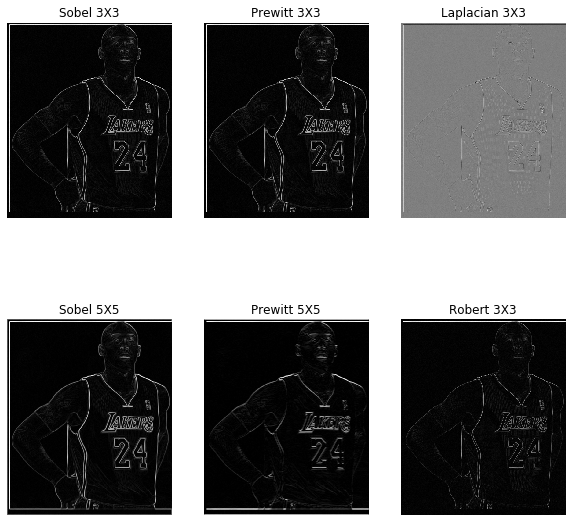

In [720]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,3), (0,0),)
ax2 = plt.subplot2grid((2,3), (0,1),)
ax3 = plt.subplot2grid((2,3), (0,2),)
ax4 = plt.subplot2grid((2,3), (1,0),)
ax5 = plt.subplot2grid((2,3), (1,1),)
ax6 = plt.subplot2grid((2,3), (1,2),)

ax1.imshow(sobel_gm,cmap = 'gray')
ax2.imshow(pw_gm,cmap = 'gray')
ax3.imshow(lap_nkobe,cmap = 'gray')
ax4.imshow(sobel_5gm,cmap = 'gray')
ax5.imshow(pw_5gm,cmap = 'gray')
ax6.imshow(rob_gm,cmap = 'gray')

ax1.set_title('Sobel 3X3')
ax2.set_title('Prewitt 3X3')
ax3.set_title('Laplacian 3X3')
ax4.set_title('Sobel 5X5')
ax5.set_title('Prewitt 5X5')
ax6.set_title('Robert 3X3')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")

plt.show()

## Q3 - BILATERAL FILTERING

In [735]:
def gaussian(x, sigma):
    t = (1.0 / (2 * math.pi * (sigma ** 2)))
    p = (x ** 2) / (2 * sigma ** 2)
    return t * np.exp(-p)

def pixBilateralFilter(src, out, x, y, diam, sigma_c, sigma_s):
    h = int(diam/2)
    iFil = 0
    Wp = 0
    i = 0
    while i < diam:
        j = 0
        while j < diam:
            nx = x - (h - i)
            ny = y - (h - j)
            if nx >= src.shape[0]: nx -= src.shape[0]
            if ny >= src.shape[1]: ny -= src.shape[1]
#             print(nx,ny,x,y)
            gs = gaussian(src[nx][ny] - src[x][y], sigma_s)
            gc = gaussian(np.sqrt((nx-x)**2 + (ny-y)**2), sigma_c)
            w = gc * gs
            iFil += src[nx][ny] * w
            Wp += w
            j += 1
        i += 1
    iFil = iFil / Wp
    out[x][y] = round(iFil)
    

In [736]:
def bilateralFilter(src, diam, sigma_c, sigma_s):
    out = np.zeros(src.shape)
    i = 0
    while i < src.shape[0]:
        j = 0
        while j < src.shape[1]:
            pixBilateralFilter(src, out, i, j, diam, sigma_c, sigma_s)
            j += 1
        i += 1
    return out

In [737]:
src = cv2.imread("../images/mountain.jpg", 0)
BFopenCV = cv2.bilateralFilter(src, 5, 12.0, 16.0)
BFout = bilateralFilter(src, 5, 12.0, 16.0)

c:\users\ankitha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

overflow encountered in ubyte_scalars



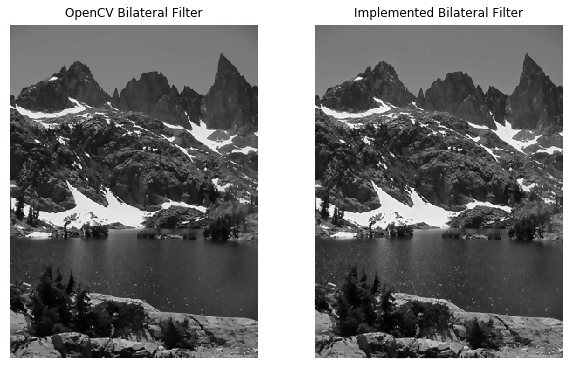

In [738]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,2), (0,0),)
ax2 = plt.subplot2grid((1,2), (0,1),)

ax1.imshow(BFopenCV,cmap = 'gray')
ax2.imshow(BFout,cmap = 'gray')

ax1.set_title('OpenCV Bilateral Filter')
ax2.set_title('Implemented Bilateral Filter')

ax1.axis("off")
ax2.axis("off")

plt.show()

In [837]:
#2d array of gaussian weights for distances which we can reuse for efficiency
def get2dKernel(d,stdev):
    arr = [[i] for i in range(int(d/2),-1,-1)]
    if d % 2 == 1:
        a = np.array(arr + arr[:-1][::-1])
    else:
        a = np.array(arr[:-1] + arr[:-1][::-1])
    k = gaussian(a,stdev)
    k = k/np.sum(k)
    x = np.stack((k,)*3, axis=-1)
    y = x.reshape((1,d,3))
    b = np.ones((d,d,3))
    return x * y * b

#the joint bilateral filter for one pixel
def jointBilateralPix(flash,noFlash,d,x,y,stdevC,stdevD,distanceKernel):
    h = int(d/2)
    #find ranges of mask
    if d % 2 == 0:
        low_x = x - h
        low_y = y - h
    else:
        low_x = x - (h +1)
        low_y = y - (h +1)
    high_x = x + (h)
    high_y = y + (h)
    #handle edge cases where the mask goes out of range
    add_x=add_y=cut_x=cut_y = 0
    if low_x < 0:
        add_x = abs(low_x)
        low_x = 0
    if low_y < 0:
        add_y = abs(low_y)
        low_y = 0
    if high_x > (flash.shape[0] -1):
        cut_x = high_x - (flash.shape[0] -1) 
        high_x = flash.shape[0] -1
    if high_y > flash.shape[1] - 1:
        cut_y = high_y - (flash.shape[1] -1) 
        high_y = flash.shape[1] -1
    # get gaussian masks
    
    colourMask = gaussian(flash[low_x:high_x,low_y:high_y] - flash[x,y],stdevC)
    distanceMask = distanceKernel[add_x:d-cut_x,add_y:d-cut_y]
    mask =  distanceMask * colourMask
    total = np.sum(mask * noFlash[low_x:high_x,low_y:high_y], axis = (0,1))
    totalDiv = np.sum(mask, axis = (0,1))

    return np.rint(total/totalDiv)

In [838]:
def jointBilateral(flash,noFlash,d,stdevC,stdevD):
    flash = flash.astype(float)
    noFlash = noFlash.astype(float)
    newImg = np.zeros((flash.shape[0],flash.shape[1],3),dtype = np.uint8)
    distanceKernel = get2dKernel(d,stdevD)
    for i in range(flash.shape[0]):
        for j in range(flash.shape[1]):
            newImg[i,j] = jointBilateralPix(flash,noFlash,d,i,j,stdevC,stdevD,distanceKernel)
    return newImg

In [839]:
noFlashImg = cv2.cvtColor(cv2.imread('../images/cake_noflash.jpg', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
flashImg = cv2.cvtColor(cv2.imread('../images/cake_flash.jpg', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
cakeOut = cv2.cvtColor(cv2.imread('../images/cake_out.jpg', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)

In [840]:
diam = 5
sigmaC = 0.25
sigmaS = 2

In [842]:
# filteredImg = jointBilateralFilter(noFlashImg,flashImg,diam,sigmaC,sigmaS)
filteredImg = jointBilateral(noFlashImg,flashImg,diam,sigmaC,sigmaS)

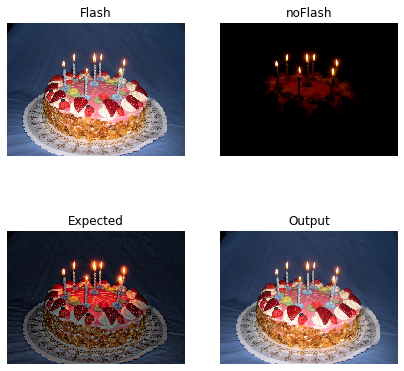

In [846]:
fig = plt.figure(figsize=(7,7))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (1,0),)
ax3 = plt.subplot2grid((2,2), (0,1),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.imshow(flashImg)
ax2.imshow(cakeOut)
ax3.imshow(noFlashImg)
ax4.imshow(filteredImg)

ax1.set_title('Flash')
ax2.set_title('Expected')
ax3.set_title('noFlash')
ax4.set_title('Output')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.show()

## Q4 - Cartoon Effect

In [770]:
def CartoonEffect(path, diam, sigmaC, sigmaS):
    im = cv2.imread(path, cv2.COLOR_BGR2RGB)
    gray = cv2.imread(path,0)
    out = np.zeros(im.shape)
    bi = np.zeros(im.shape)
    edgeMask = np.zeros(gray.shape)
    blur = customAvgFilter(gray,3)
    t = skimage.filters.threshold_otsu(blur)
    edgeMask = blur > t
    edgeMask = edgeMask.astype(int)
    for i in range(im.shape[2]):
        bi[:,:,i] = bilateralFilter(im[:,:,i], diam, sigmaC, sigmaS)
        out[:,:,i] = np.bitwise_and(bi[:,:,i].astype(int),edgeMask)
    return out

In [983]:
diam = 5
sigmaC = 100
sigmaS = 100
path = '../images/car.jpg'

In [984]:
im = cv2.imread(path, cv2.COLOR_BGR2RGB)
gray = cv2.imread(path,0)
out = np.zeros(im.shape)
bi = np.zeros(im.shape)
blur = customAvgFilter(gray,3).astype('uint8')
edgeMask = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2) 
edgeMask = cv2.cvtColor(edgeMask, cv2.COLOR_GRAY2RGB) 
edgeMask = edgeMask.astype(int)

In [ ]:

for i in range(im.shape[2]):
    bi[:,:,i] = bilateralFilter(im[:,:,i], diam, sigmaC, sigmaS)
    out[:,:,i] = np.bitwise_and(bi[:,:,i], edgeMask[:,:,i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


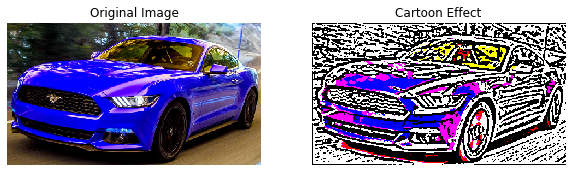

In [987]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,2), (0,0),)
ax2 = plt.subplot2grid((1,2), (0,1),)
ax1.imshow(im)
ax2.imshow(out)
ax1.set_title('Original Image')
ax2.set_title('Cartoon Effect')
ax1.axis("off")
ax2.axis("off")
plt.show()

## Q5 - Fourier Transform

In [751]:
def dft2D(im):
    (M, N) = im.shape
    dft = np.zeros(im.shape)
    for k in range(M):
        for l in range(N):
            sum1 = 0.0
            for m in range(M):
                for n in range(N):
                    e = np.exp(- 1j * 2 * np.pi * (float(k * m) / M + float(l * n) / N))
                    sum1 += im[m, n] * e
            dft[l][k] = sum_red / M / N
    return dft

In [460]:
def pad(f):
    n = len(f)
    N = 2 ** int(ceil(log(n, 2)))
    pad = int((N-n)/2)
    F = np.zeros((N,))
    F[pad:N-pad] = f
    return F

def pad2D(f):    
    m, n = len(f), len(f[0])
    M, N = 2 ** int(ceil(log(m, 2))), 2 ** int(ceil(log(n, 2)))    
    pad_m = int((M-m)/2)
    pad_n = int((N-n)/2)
    F = np.zeros((M,N))
    F[pad_m:M-pad_m,pad_n:N-pad_n] = f
    return F

In [ ]:
def fft(f):
    f = np.asarray(f, dtype=float)
    N = f.shape[0]
    if N <= 1: return f
    even = fft(f[0::2])
    odd =  fft(f[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N // 2] * odd, even + factor[N // 2:] * odd])

def fft1D(f):
    return fft(pad(f))

def fft2D(f):
    F = np.asarray(pad2D(f))
    M, N = F.shape[0], F.shape[1]
    Fuv = np.zeros(F.shape,dtype="complex_")
    Fxv = np.zeros(F.shape,dtype="complex_")
    for i in range(N):
        Fxv[:,i] = fft(F[:,i])
    for j in range(M):
        Fuv[j] = fft(Fxv[j])
    return Fuv
    

In [758]:
def ifft(f):
    return np.conjugate(fft(np.absolute(np.conjugate(pad(f)))))

def ifft2D(f):
    F = np.asarray(pad2D(f))
    M, N = F.shape[0], F.shape[1]
    Fuv = np.zeros(F.shape,dtype="complex_")
    Fxv = np.zeros(F.shape,dtype="complex_")
    for i in range(M):
        Fxv[i] = ifft(F[i])
    for j in range(N):
        Fuv[:,j] = ifft(Fxv[:,j])
    return Fuv

In [462]:
ss = cv2.imread("../images/sstar.jpg", 0)

In [463]:
ssfft = fft2D(ss)
ss1 = fft2D(ssfft)

(256, 256)


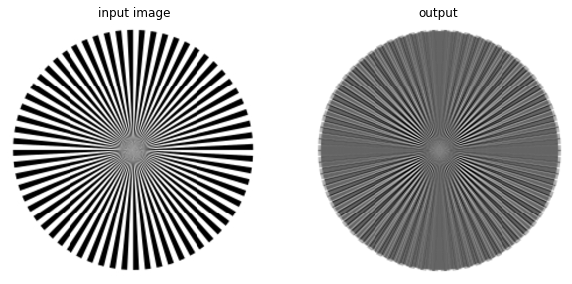

In [757]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,2), (0,0),)
ax2 = plt.subplot2grid((1,2), (0,1),)

ax1.imshow(ss,cmap = 'gray')
ax2.imshow(np.absolute(ss1),cmap = 'gray')

ax1.set_title('input image')
ax2.set_title('output')

ax1.axis("off")
ax2.axis("off")

plt.show()

## Q6 - Fourier Transforms

In [477]:
f = cv2.imread("../images/sstar.jpg", 0)
h = cv2.imread("../images/efft.jpg", 0)
print(f.shape,h.shape)

(256, 256) (256, 256)


In [539]:
def zeroPad(im,k):
    c,r = im.shape[:2] 
    pad = int((k-1)/2)
    N,M = c+k,r+k      
    tmp = np.zeros((N,M))
    if k%2==1:
        tmp[pad:N-pad-1,pad:M-pad-1] = im
    else:        
        tmp[pad+1:N-pad-1,pad+1:M-pad-1] = im
    return tmp

In [517]:
def convolution(f, h, k):
    M, N = f.shape
    w = int((k - 1) / 2)
    out = np.zeros(f.shape)
    paddedImage = zeroPad(f,k)
    for row in range(M):
        for col in range(N):
            out[row, col] = np.sum(h * paddedImage[row:row + k, col:col + k])
    return out

In [519]:
F = fft2D(f)
H = fft2D(h)

Ginv = ifft2D(np.multiply(F,H))
g = convolution(f,h,256)

In [542]:
f511 = zeroPad(f,255)
h511 = zeroPad(h,255)

Ginv511 = ifft2D(np.multiply(fft2D(f),fft2D(h)))
g511 = convolution(f511,h511,511)

In [990]:
avg_sq_diff_1 = np.average(np.square(Ginv-g))
avg_sq_diff_2 = np.average(np.square(Ginv511-g511[127:383,127:383]))

print(np.abs(avg_sq_diff_1),np.abs(avg_sq_diff_2))

2.4522810527020497e+28 2.4522810527020497e+28


In [589]:
i64 = cv2.imread("../images/im64.jpg", 0)

In [590]:
def doublePad(im):
    c,r = im.shape[:2]
    out = np.zeros((2*c,2*r))
    out[0:c,0:r] = im
    return out

In [591]:
i128 = doublePad(i64)
i256 = doublePad(i128)
i512 = doublePad(i256)

In [592]:
fft64 = fft2D(i64)
fft128 = fft2D(i128)
fft256 = fft2D(i256)
fft512 = fft2D(i512)

(64, 64)
(128, 128)
(256, 256)
(512, 512)


In [ ]:
fig = plt.figure(figsize=(20,20))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.imshow(np.absolute(fft64).astype(float),cmap = 'gray')
ax2.imshow(np.absolute(fft128).astype(float),cmap = 'gray')
ax3.imshow(np.absolute(fft256).astype(float),cmap = 'gray')
ax4.imshow(np.absolute(fft512).astype(float),cmap = 'gray')

plt.show()

## Q7 - Denoise noisy_lena

In [862]:
nlena = cv2.imread("../images/noisy_lena.png", 0)

Eliminating the frequencies responsible for noise

c:\users\ankitha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part



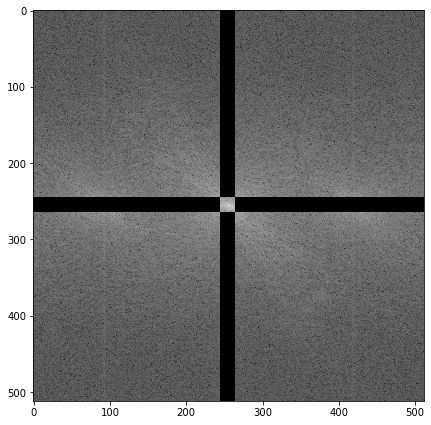

In [989]:
F1 = fft2((nlena).astype(float))
F2 = fftpack.fftshift(F1)
w,h = nlena.shape
a = 245
b = 265
F2[a:b,:a] = F2[a:b,b:] = F2[:a,a:b] = F2[b:,a:b] = 0
plt.figure(figsize=(7,10))
plt.imshow( (20*np.log10( 1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()


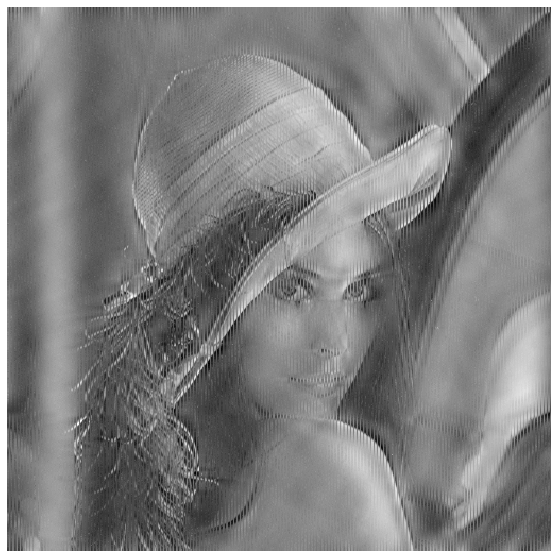

In [910]:
im1 = ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()